<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/RJD2Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 132 (delta 41), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (132/132), 15.56 MiB | 8.53 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [43]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-10"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#TejashwiYadav bihar")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('rjd2.csv') 


Streaming output truncated to the last 5000 lines.
🔺156 - 169  Mahagathbandhan 
🔻 70 - 88  BJP + JDU
🔺05 -.08  LJP.
🔻06 - 11…
<--------------------------------------------------->
582
RT @suryapsingh_IAS: Bihar polls are almost over, Exit polls are about to begin. Let them forecast anything, Nitish is out and #TejashwiYad…
<--------------------------------------------------->
583
RT @suryapsingh_IAS: Bihar polls are almost over, Exit polls are about to begin. Let them forecast anything, Nitish is out and #TejashwiYad…
<--------------------------------------------------->
584
RT @sandipGopani_: Salutes to the awared and revolutionary people of #Bihar who has kept aside the politics of #Jumla, and exercised their…
<--------------------------------------------------->
585
Tejaswi will have to undo the mistakes made by his seniors in the past - Bihar needs education and jobs ..it has hu… https://t.co/wk4SeaLJSv
<--------------------------------------------------->
586
RT @DogawithINC: Few 

# **Importing Libraries**

In [44]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning** **RJDDataset2**

```
# length of the dataset12
```



In [45]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

1780

# Removing duplicate tweets if any

In [46]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

747

```
No of duplicate tweets
```

In [47]:
df1['Tweet'].duplicated().sum()

1033

In [48]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(747, 1)

`Removed all the dupliactes`



# **Removing Emojis**


In [49]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'[link text](https://)

In [50]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

177

In [51]:
df1.shape

(570, 2)

In [52]:
df1['Processed_Tweet']

0      Happy birthday chief minister of bihar @yadavt...
1      Former Deputy Chief Minister and currently Lea...
2      Story 82 from #Bihar- \n\nFor birthday, Tejash...
3      Happy Birthday @yadavtejashwi : Congratulation...
4      Happy Birthday....\nTo My Beloved Future Chief...
                             ...                        
742    @scribe_prashant Bihar elections 2020: JD(U) a...
743    Bihar elections 2020: JD(U) accuses Chirag Pas...
744    @ANI New wave in Bihar ⚡⚡⚡\n#GoBackModi #Tejas...
745    Reasons to celebrate Diwali.\n\nTrump loses in...
746    "#NityanandRai could have been where #Tejashwi...
Name: Processed_Tweet, Length: 570, dtype: object

# **Removing Username**

In [53]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

0      Happy birthday chief minister of bihar   \n#Te...
1      Former Deputy Chief Minister and currently Lea...
2      Story 82 from #Bihar- \n\nFor birthday, Tejash...
3      Happy Birthday   : Congratulations for your ha...
4      Happy Birthday....\nTo My Beloved Future Chief...
                             ...                        
742      Bihar elections 2020: JD(U) accuses Chirag P...
743    Bihar elections 2020: JD(U) accuses Chirag Pas...
744      New wave in Bihar ⚡⚡⚡\n#GoBackModi #Tejashwi...
745    Reasons to celebrate Diwali.\n\nTrump loses in...
746    "#NityanandRai could have been where #Tejashwi...
Name: Processed_Tweet, Length: 570, dtype: object

# **Removing URL if any**

In [54]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

0      Happy birthday chief minister of bihar   \n#Te...
1      Former Deputy Chief Minister and currently Lea...
2      Story 82 from #Bihar- \n\nFor birthday, Tejash...
3      Happy Birthday   : Congratulations for your ha...
4      Happy Birthday....\nTo My Beloved Future Chief...
                             ...                        
742      Bihar elections 2020: JD(U) accuses Chirag P...
743    Bihar elections 2020: JD(U) accuses Chirag Pas...
744      New wave in Bihar ⚡⚡⚡\n#GoBackModi #Tejashwi...
745    Reasons to celebrate Diwali.\n\nTrump loses in...
746    "#NityanandRai could have been where #Tejashwi...
Name: Processed_Tweet, Length: 570, dtype: object

# **Removing Hashtags but keeping the word**

In [55]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

0      Happy birthday chief minister of bihar   \nTej...
1      Former Deputy Chief Minister and currently Lea...
2      Story 82 from Bihar- \n\nFor birthday, Tejashw...
3      Happy Birthday   : Congratulations for your ha...
4      Happy Birthday....\nTo My Beloved Future Chief...
                             ...                        
742      Bihar elections 2020: JD(U) accuses Chirag P...
743    Bihar elections 2020: JD(U) accuses Chirag Pas...
744      New wave in Bihar ⚡⚡⚡\nGoBackModi TejashwiYa...
745    Reasons to celebrate Diwali.\n\nTrump loses in...
746    "NityanandRai could have been where TejashwiYa...
Name: Processed_Tweet, Length: 570, dtype: object

# ***Using Preprocessor Library***

In [56]:
!pip install preprocessor

In [58]:
!pip install tweet-preprocessor

In [57]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

0      Happy birthday chief minister of bihar Tejashw...
1      Former Deputy Chief Minister and currently Lea...
2      Story from Bihar- For birthday, Tejashwi asks ...
3      Happy Birthday : Congratulations for your hard...
4      Happy Birthday....To My Beloved Future Chief M...
                             ...                        
742    Bihar elections : JD(U) accuses Chirag Paswan ...
743    Bihar elections : JD(U) accuses Chirag Paswan ...
744    New wave in Bihar GoBackModi TejashwiYadav Bih...
745    Reasons to celebrate Diwali.Trump loses in USA...
746    "NityanandRai could have been where TejashwiYa...
Name: Processed_Tweet, Length: 570, dtype: object

# **Removing any special characters, numbers, punctuations,etc..**

In [59]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

0      Happy birthday chief minister of bihar Tejashw...
1      Former Deputy Chief Minister and currently Lea...
2      Story from Bihar  For birthday  Tejashwi asks ...
3      Happy Birthday   Congratulations for your hard...
4      Happy Birthday    To My Beloved Future Chief M...
                             ...                        
742    Bihar elections   JD U  accuses Chirag Paswan ...
743    Bihar elections   JD U  accuses Chirag Paswan ...
744    New wave in Bihar GoBackModi TejashwiYadav Bih...
745    Reasons to celebrate Diwali Trump loses in USA...
746     NityanandRai could have been where TejashwiYa...
Name: Processed_Tweet, Length: 570, dtype: object

# **Converting to lowercase**

In [60]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

0      happy birthday chief minister of bihar tejashw...
1      former deputy chief minister and currently lea...
2      story from bihar  for birthday  tejashwi asks ...
3      happy birthday   congratulations for your hard...
4      happy birthday    to my beloved future chief m...
                             ...                        
742    bihar elections   jd u  accuses chirag paswan ...
743    bihar elections   jd u  accuses chirag paswan ...
744    new wave in bihar gobackmodi tejashwiyadav bih...
745    reasons to celebrate diwali trump loses in usa...
746     nityanandrai could have been where tejashwiya...
Name: Processed_Tweet, Length: 570, dtype: object

In [61]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

**`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`**

# **Removing Stop Words**

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["shouldn't", 'while', 'doing', 'as', 'yourselves', 'ain', "mustn't", 'can', 'any', 'during', 'because', "that'll", 'few', 'am', 'but', 'at', 'wouldn', "wasn't", 'its', 'have', 'when', 'them', 'this', 'myself', 'hadn', 's', 'shan', 'ours', 'down', 'yours', 'o', 'being', 'her', 'he', 'on', 're', 'mightn', "shan't", 'again', 'or', 'until', "hasn't", 'wasn', 'what', 'you', 'himself', 'to', "hadn't", "wouldn't", 'into', 'herself', 'nor', 'weren', 'now', 'if', "doesn't", 'such', 'are', 'further', "you'll", 'no', "should've", "needn't", 'i', 'his', 'doesn', 'where', 'ourselves', 'was', 'yourself', 'won', 'couldn', 'were', 'between', "don't", 'same', 'll', 'up', 'each', 'haven', 'there', 'over', 'their', 'y', 'themselves', 'under', 'has', 'not', 'we', 'm', 'by', "aren't", 'she', "didn't", 'hasn', 'through', 'and', 'once', 'the', 'for', 'so', 'it', 'own', 'only', 'a', 'both', 'my', "it's", 'more', 'after', 'all', 'should', "isn't", 'than', 'd', 'why', "you've", 'itself', "haven't", 'of', 'then

In [64]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

0      happy birthday chief minister bihar tejashwiya...
1      former deputy chief minister currently leader ...
2      story bihar birthday tejashwi asks supporters ...
3      happy birthday congratulations hard work bihar...
4      happy birthday beloved future chief minister b...
                             ...                        
742    bihar elections jd u accuses chirag paswan han...
743    bihar elections jd u accuses chirag paswan han...
744    new wave bihar gobackmodi tejashwiyadav biharw...
745    reasons celebrate diwali trump loses usarnab j...
746    nityanandrai could tejashwiyadav today bihars ...
Name: Processed_Tweet, Length: 570, dtype: object

# **Tokenizing**

In [65]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

0      [happy, birthday, chief, minister, bihar, teja...
1      [former, deputy, chief, minister, currently, l...
2      [story, bihar, birthday, tejashwi, asks, suppo...
3      [happy, birthday, congratulations, hard, work,...
4      [happy, birthday, beloved, future, chief, mini...
                             ...                        
742    [bihar, elections, jd, u, accuses, chirag, pas...
743    [bihar, elections, jd, u, accuses, chirag, pas...
744    [new, wave, bihar, gobackmodi, tejashwiyadav, ...
745    [reasons, celebrate, diwali, trump, loses, usa...
746    [nityanandrai, could, tejashwiyadav, today, bi...
Name: Processed_Tweet, Length: 570, dtype: object

# **Stemming**

In [66]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

0      [happi, birthday, chief, minist, bihar, tejash...
1      [former, deputi, chief, minist, current, leade...
2      [stori, bihar, birthday, tejashwi, ask, suppor...
3      [happi, birthday, congratul, hard, work, bihar...
4      [happi, birthday, belov, futur, chief, minist,...
                             ...                        
742    [bihar, elect, jd, u, accus, chirag, paswan, h...
743    [bihar, elect, jd, u, accus, chirag, paswan, h...
744    [new, wave, bihar, gobackmodi, tejashwiyadav, ...
745    [reason, celebr, diwali, trump, lose, usarnab,...
746    [nityanandrai, could, tejashwiyadav, today, bi...
Name: Processed_Tweet, Length: 570, dtype: object

In [67]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
0,Happy birthday chief minister of bihar @yadavt...,"[happi, birthday, chief, minist, bihar, tejash..."
1,Former Deputy Chief Minister and currently Lea...,"[former, deputi, chief, minist, current, leade..."
2,"Story 82 from #Bihar- \n\nFor birthday, Tejash...","[stori, bihar, birthday, tejashwi, ask, suppor..."
3,Happy Birthday @yadavtejashwi : Congratulation...,"[happi, birthday, congratul, hard, work, bihar..."
4,Happy Birthday....\nTo My Beloved Future Chief...,"[happi, birthday, belov, futur, chief, minist,..."
...,...,...
742,@scribe_prashant Bihar elections 2020: JD(U) a...,"[bihar, elect, accus, chirag, paswan, hand, gl..."
743,Bihar elections 2020: JD(U) accuses Chirag Pas...,"[bihar, elect, accus, chirag, paswan, hand, gl..."
744,@ANI New wave in Bihar ⚡⚡⚡\n#GoBackModi #Tejas...,"[new, wave, bihar, gobackmodi, tejashwiyadav, ..."
745,Reasons to celebrate Diwali.\n\nTrump loses in...,"[reason, celebr, diwali, trump, lose, usarnab,..."


In [68]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

4768

In [69]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

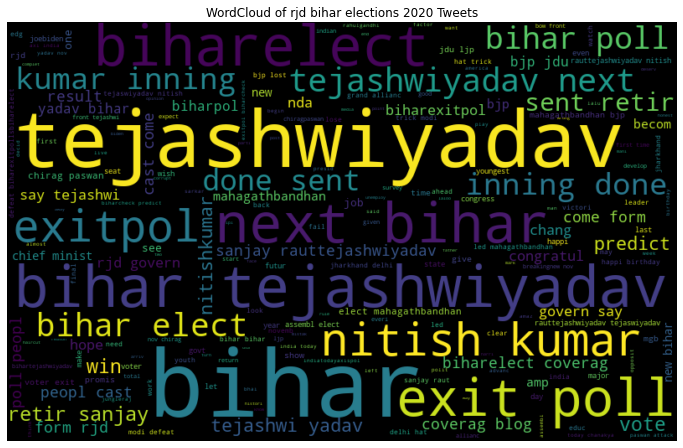

In [70]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of rjd bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**




In [71]:
from textblob import TextBlob

In [72]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

570

In [73]:
df1['Processed_Tweet']

0      [happi, birthday, chief, minist, bihar, tejash...
1      [former, deputi, chief, minist, current, leade...
2      [stori, bihar, birthday, tejashwi, ask, suppor...
3      [happi, birthday, congratul, hard, work, bihar...
4      [happi, birthday, belov, futur, chief, minist,...
                             ...                        
742    [bihar, elect, accus, chirag, paswan, hand, gl...
743    [bihar, elect, accus, chirag, paswan, hand, gl...
744    [new, wave, bihar, gobackmodi, tejashwiyadav, ...
745    [reason, celebr, diwali, trump, lose, usarnab,...
746    [nityanandrai, could, tejashwiyadav, today, bi...
Name: Processed_Tweet, Length: 570, dtype: object



```
**# Classifying tweets as neutral, positive, negative**
```




In [74]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 168
Negative Tweets: 38
Neutral Tweets 364


In [75]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.580,0.420,0.7003
2,0.000,0.748,0.252,0.4019
3,0.167,0.833,0.000,-0.1027
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
565,0.000,0.714,0.286,0.4939
566,0.000,0.714,0.286,0.4939
567,0.000,1.000,0.000,0.0000
568,0.213,0.787,0.000,-0.4019


In [77]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.580,0.420,0.7003,Positive
2,0.000,0.748,0.252,0.4019,Positive
3,0.167,0.833,0.000,-0.1027,Negative
4,0.000,1.000,0.000,0.0000,Neutral


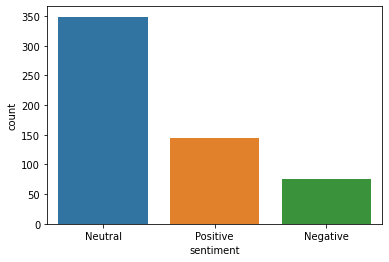

In [78]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)